## libraries

In [99]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
smote=SMOTE()
from pycaret.classification import setup

## short variable description
* **date**: Date in MM-DD-YYYY format.
* **day**: Day of the week.
* **quarter**: Segment of the month divided into four quarters.
* **department**: Relevant department associated with the instance.
* **team_no**: Specific team number associated with the instance.
* **no_of_workers**: Quantity of workers in each team.
* **no_of_style_change**: Number of style alterations for a specific product.
* **targeted_productivity**: Planned productivity established by the authority for * each team per day. smv: Standard Minute Value, indicating the allocated time for a task.
* **wip**: Work in progress, encompassing the quantity of unfinished items for products.
* **over_time**: Reflects the overtime duration by each team, measured in minutes.
* **incentive**: Represents the monetary incentive (in BDT) intended to encourage specific actions. idle_time: Duration of time when production was interrupted due to various reasons.
* **idle_men**: Number of workers rendered idle due to production interruptions.
* **actual_productivity**: The actual percentage of productivity achieved by workers, ranging from 0 to 1.

In [100]:
df = pd.read_csv('/Users/polaparol/Documents/DS-sem4/consulting/productivity.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [101]:
df.head(10)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
7,1/1/2015,Quarter1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
8,1/1/2015,Quarter1,sweing,Thursday,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098
9,1/1/2015,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428


In [102]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [103]:
df['wip'].fillna(int(df['wip'].mean()), inplace=True)

In [104]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,1197.0,1190.269006,1395.647280,7.000000,970.000000,1190.000000,1190.000000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000


In [105]:
df.duplicated().sum() # no duplicates

0

In [106]:
df['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

In [107]:
df = pd.get_dummies(df, columns=['quarter'], prefix='quarter')
df.rename(columns = {'quarter_Quarter1':'quarter1','quarter_Quarter2':'quarter2', 'quarter_Quarter3':'quarter3', 'quarter_Quarter4':'quarter4', 'quarter_Quarter5':'quarter5' }, inplace = True)
df.drop('quarter5', axis=1, inplace=True)

In [108]:
df['day'] = pd.to_datetime(df['date']).apply(lambda x: x.day)
df['month'] = pd.to_datetime(df['date']).apply(lambda x: x.month)
df['num_week'] = pd.to_datetime(df['date']).apply(lambda x: x.weekofyear)
df.drop(['date'], axis=1, inplace=True)

In [109]:
df['department'].value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [110]:
print(df['department'].unique())


['sweing' 'finishing ' 'finishing']


In [111]:
df['department'] = df['department'].str.strip()

In [112]:
df = pd.get_dummies(df, columns=['department'])

In [113]:
df.sample(10)

,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,quarter1,quarter2,quarter3,quarter4,month,num_week,department_finishing,department_sweing
43,4,6,0.80,11.61,539.0,6975,50,0.0,0,0,31.0,0.879714,1,0,0,0,1,1,0,1
856,19,4,0.75,5.13,1190.0,1920,0,0.0,0,0,8.0,0.684028,0,0,1,0,2,8,1,0
292,17,7,0.80,2.90,1190.0,1440,0,0.0,0,0,8.0,0.661837,0,0,1,0,1,3,1,0
284,17,12,0.80,11.61,1039.0,5670,63,0.0,0,0,31.5,0.800247,0,0,1,0,1,3,0,1
625,5,7,0.70,3.94,1190.0,1200,0,0.0,0,0,10.0,0.847100,1,0,0,0,2,6,1,0
571,2,12,0.75,4.08,1190.0,1080,0,0.0,0,0,9.0,0.740444,1,0,0,0,2,6,1,0
338,20,6,0.80,11.41,1047.0,5580,63,0.0,0,0,31.0,0.800261,0,0,1,0,1,4,0,1
1169,10,7,0.60,30.48,1017.0,6840,25,0.0,0,1,57.0,0.630403,0,1,0,0,3,11,0,1
211,12,11,0.65,12.52,1004.0,9540,44,0.0,0,0,53.0,0.649981,0,1,0,0,1,3,0,1
22,3,3,0.75,3.94,1190.0,1560,0,0.0,0,0,8.0,0.945278,1,0,0,0,1,1,1,0


                            day      team  targeted_productivity       smv  \
day                    1.000000  0.018423              -0.113448  0.001263   
team                   0.018423  1.000000               0.030274 -0.110011   
targeted_productivity -0.113448  0.030274               1.000000 -0.069489   
smv                    0.001263 -0.110011              -0.069489  1.000000   
wip                   -0.079690 -0.025379               0.049103 -0.018178   
over_time              0.029768 -0.096737              -0.088557  0.674887   
incentive             -0.043032 -0.007674               0.032768  0.032629   
idle_time             -0.045663  0.003796              -0.056181  0.056863   
idle_men              -0.022035  0.026974              -0.053818  0.105901   
no_of_style_change     0.186703 -0.011194              -0.209294  0.315388   
no_of_workers         -0.004733 -0.075113              -0.084288  0.912176   
actual_productivity   -0.050249 -0.148753               0.421594

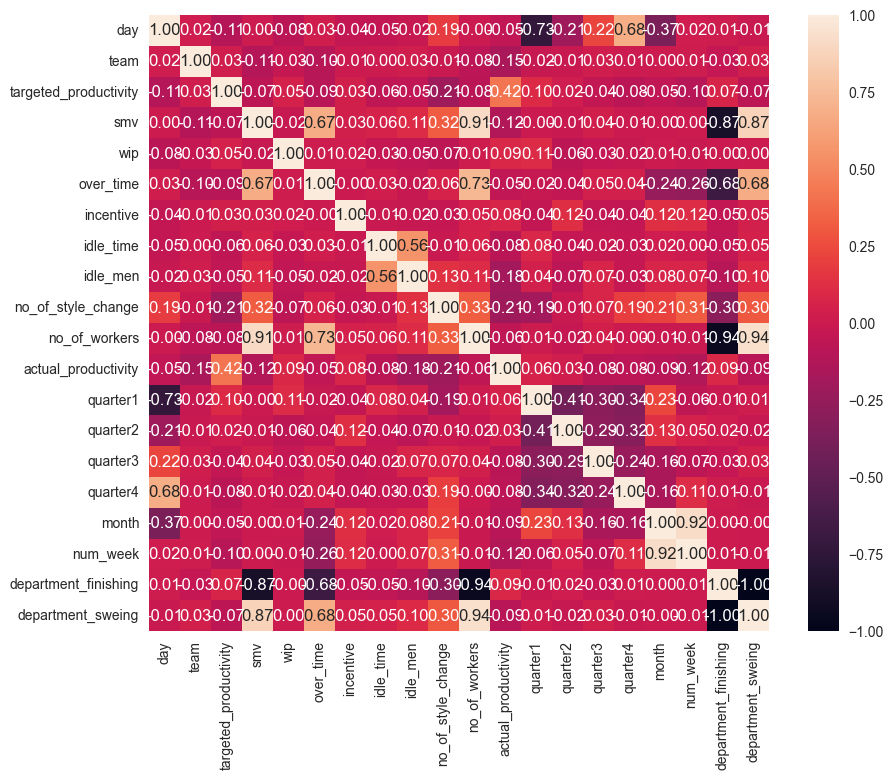

In [114]:
correlation_matrix = df.corr()
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

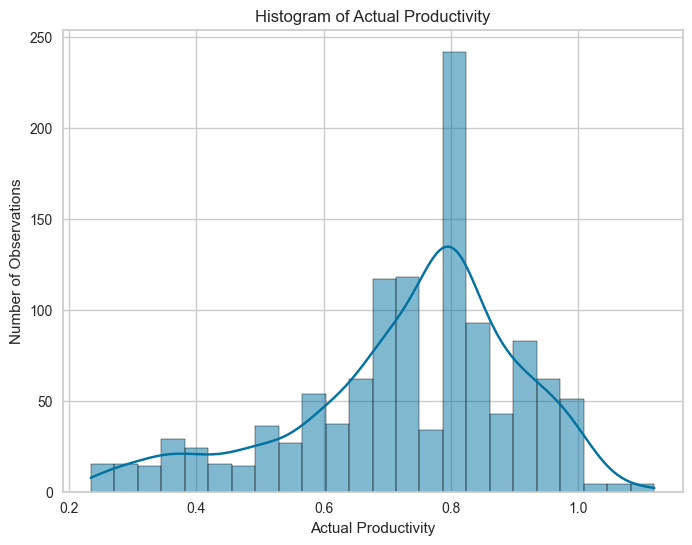

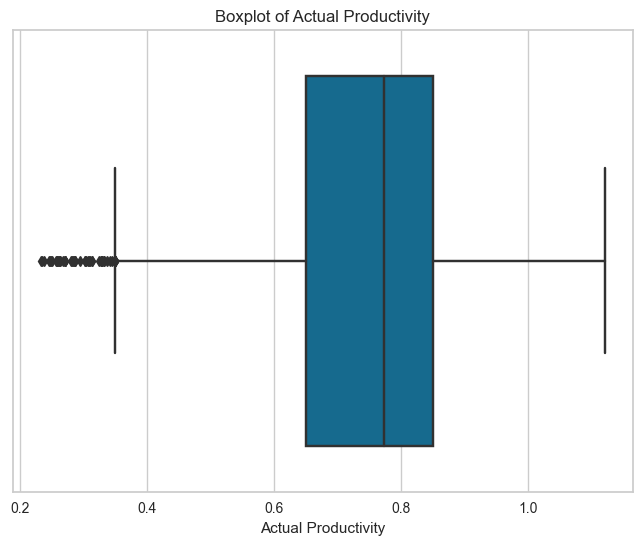

In [115]:
# Histogram of Actual Productivity
plt.figure(figsize=(8, 6))
sns.histplot(df['actual_productivity'], kde=True)
plt.title('Histogram of Actual Productivity')
plt.xlabel('Actual Productivity')
plt.ylabel('Number of Observations')
plt.show()

# Boxplot of Actual Productivity
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['actual_productivity'])
plt.title('Boxplot of Actual Productivity')
plt.xlabel('Actual Productivity')
plt.show()

In [116]:
df.columns

Index(['day', 'team', 'targeted_productivity', 'smv', 'wip', 'over_time',
       'incentive', 'idle_time', 'idle_men', 'no_of_style_change',
       'no_of_workers', 'actual_productivity', 'quarter1', 'quarter2',
       'quarter3', 'quarter4', 'month', 'num_week', 'department_finishing',
       'department_sweing'],
      dtype='object')

## modeling
### dividing dataset - X & Y

In [117]:
X = df.drop(['actual_productivity'], axis=1)
X.head()

,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,quarter1,quarter2,quarter3,quarter4,month,num_week,department_finishing,department_sweing
0,1,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,1,0,0,0,1,1,0,1
1,1,1,0.75,3.94,1190.0,960,0,0.0,0,0,8.0,1,0,0,0,1,1,1,0
2,1,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,1,0,0,0,1,1,0,1
3,1,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,1,0,0,0,1,1,0,1
4,1,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,1,0,0,0,1,1,0,1


In [118]:
y = df['actual_productivity']
y.head()

0    0.940725
1    0.886500
2    0.800570
3    0.800570
4    0.800382
Name: actual_productivity, dtype: float64

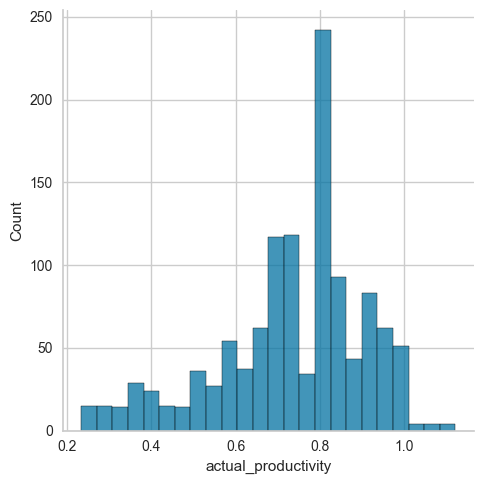

In [119]:
sns.displot(y)

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

model_lin = LinearRegression()
model_lin.fit(X_train, y_train)

y_pred_lin = model_lin.predict(X_test)
print("R^2 (Linear Regression):", r2_score(y_test, y_pred_lin))
print("RMSE (Linear Regression):", mean_squared_error(y_test, y_pred_lin, squared=False))


R^2 (Linear Regression): 0.23640104653630656
RMSE (Linear Regression): 0.15231804750145872


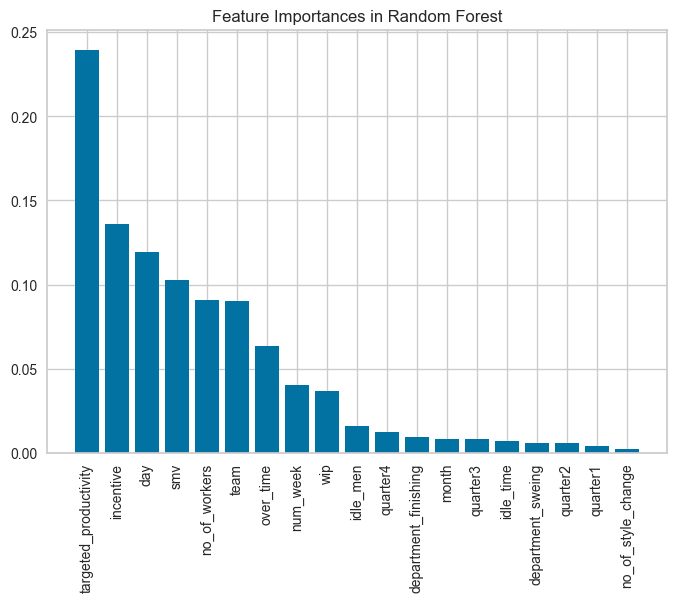

In [125]:
import matplotlib.pyplot as plt

model_rf = RandomForestRegressor(n_estimators=100, random_state=0)
model_rf.fit(X_train, y_train)

importances_rf = model_rf.feature_importances_

indices_rf = np.argsort(importances_rf)[::-1]
plt.figure()
plt.title("Feature Importances in Random Forest")
plt.bar(range(X_train.shape[1]), importances_rf[indices_rf])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices_rf], rotation=90)
plt.show()


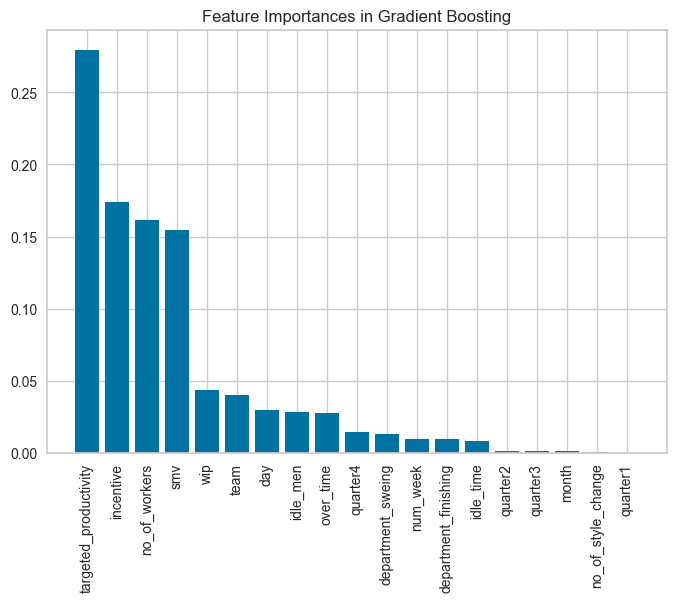

In [126]:
model_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=0)
model_gb.fit(X_train, y_train)

importances_gb = model_gb.feature_importances_

indices_gb = np.argsort(importances_gb)[::-1]
plt.figure()
plt.title("Feature Importances in Gradient Boosting")
plt.bar(range(X_train.shape[1]), importances_gb[indices_gb])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices_gb], rotation=90)
plt.show()
